# **TELECOM X - CHURN DE CLIENTES**

## **EXTRACCIÓN DATOS** 📑

**Instalamos la biblioteca pandas para realizar el análisis de datos**

In [101]:
!pip install pandas

**Se importó pandas para realizar la extracción desde la API, el análisis y visualización de los datos**

In [102]:
import pandas as pd
from IPython.display import display

try:
    url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
    df_telecomx = pd.read_json(url)

except Exception as e:
    # Datos no localizados de la API
    print(f'Error al extraer los datos: {e}')

else:
    # Usamos display() para ver el DataFrame formateado si no hay error
    print("Datos cargados exitosamente:")
    display(df_telecomx.head())


Datos cargados exitosamente:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Se aplicó el método [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) que muestra un resumen de los datos**

In [103]:
try:
  df_telecomx.info()
except Exception as e:
  print(f'Error al extraer los datos: {e}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## **TRANSFORMACION** 🔧

**Se aplicó el método [json_normalize()](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html) para normalizar y extraer los datos dentro de los diccionarios de cada columna y creando un DataFrame con cada uno**

In [104]:
try:
  df_costumer = pd.json_normalize(df_telecomx['customer'])
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_costumer.head())

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [105]:
try:
  df_internet = pd.json_normalize(df_telecomx['phone'])

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_internet.head())

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [106]:
try:
  df_phone = pd.json_normalize(df_telecomx['internet'])
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_phone.head())

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [107]:
try:
  df_account = pd.json_normalize(df_telecomx['account'])
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_account.head())

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


**Se aplicó el método [concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) para unir todos los DataFrame y compilar nuevamente la información**

In [108]:
try:
  pd.set_option('display.max_columns',None)
  df_telecomx_normalizado = pd.concat([
    df_telecomx[['customerID','Churn']],
    df_costumer,df_phone,df_internet,df_account], axis=1)

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

else:
  display(df_telecomx_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,No,Yes,Yes,No,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,No,No,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Conociendo los nuevos datos: Se aplicó el método [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) para mostrar un resumen de los datos.**

In [109]:
try:
  df_telecomx_normalizado.info()
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  PhoneService      7267 non-null   object 
 15  MultipleLines     7267 non-null   object 
 16  Contract          7267 non-null   object 


**Preparando los datos: Se realizo el renombrado de las columnas Charges.Monthly y Charges.Total por ChargesMonthly y ChargesTotal para mayor legibilidad con el método [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)**

In [110]:
try:
  df_telecomx_normalizado = df_telecomx_normalizado.rename(columns={'Charges.Monthly':'ChargesMonthly','Charges.Total':'ChargesTotal'})
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

else:
  display(df_telecomx_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,No,Yes,Yes,No,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,No,No,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Se instaló la biblioteca Numpy para realizar la formatación de los datos y el método [to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric) para convertir los valores de la columnas en números, en conjunto del método [interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) para rellenar los valores NaN y por último utilizamos los métodos [isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) juntó a [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts) para contar y validar que no no haya ningún NaN**

In [111]:
try:
  !pip install numpy
  import numpy as np
  df_telecomx_normalizado['ChargesTotal'] = pd.to_numeric(df_telecomx_normalizado['ChargesTotal'], errors='coerce')
  df_telecomx_normalizado['ChargesTotal'] = df_telecomx_normalizado['ChargesTotal'].interpolate(method='linear', limit_direction='both')


  df_telecomx_normalizado['ChargesMonthly'] = pd.to_numeric(df_telecomx_normalizado['ChargesMonthly'], errors='coerce')
  df_telecomx_normalizado['ChargesMonthly'] = df_telecomx_normalizado['ChargesMonthly'].interpolate(method='linear', limit_direction='both')

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

else:
  display(df_telecomx_normalizado[['ChargesMonthly','ChargesTotal']].isna().value_counts())


,,count
ChargesMonthly,ChargesTotal,
False,False,7267


**Se utilizó el método [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace) para formatear las columnas con valores Yes y No, ha números binarios donde 1 es igual a Yes y 0 es igual a No, también utilizamos el método [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) para aplicar el cambio de tipo de dato a las columnas y así obtener mejor procesamiento al momento del análisis**

In [112]:
cols_yes_no = [
    'Churn','Partner','Dependents','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'PhoneService','MultipleLines','PaperlessBilling'
    ]


In [113]:
try:
    pd.set_option('future.no_silent_downcasting', True)
    df_telecomx_normalizado[cols_yes_no] = ( df_telecomx_normalizado[cols_yes_no].replace({'Yes': 1, 'No': 0})
    .apply(pd.to_numeric, errors='coerce'))


    df_telecomx_normalizado[cols_yes_no] = df_telecomx_normalizado[cols_yes_no].interpolate(method='linear', limit_direction='both').astype(int)

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

else:
  display(df_telecomx_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,0,1,1,0,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,0,0,0,1,1,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,1,0,0,0,1,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,1,0,1,1,1,0,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,0,1,1,0,1,0,Month-to-month,1,Mailed check,83.9,267.40


**Creación de columna: Cargo diario promedio**

In [114]:
try:
  df_telecomx_normalizado['ChargesDaily_Total'] = 0.0

  df_telecomx_normalizado.loc[df_telecomx_normalizado['tenure'] > 0, 'ChargesDaily_Total'] = (
  df_telecomx_normalizado.loc[df_telecomx_normalizado['tenure'] > 0, 'ChargesTotal'] /
   (df_telecomx_normalizado.loc[df_telecomx_normalizado['tenure'] > 0, 'tenure'] * 30)
  ).round(2)
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

else:
  display(df_telecomx_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDaily_Total
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,0,1,1,0,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,0,0,0,1,1,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,1,0,0,0,1,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,1,0,1,1,1,0,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,0,1,1,0,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


**Confirmar que no hallan datos nulos en las columnas**

In [115]:
df_telecomx_normalizado[cols_yes_no].isna().value_counts()

,,,,,,,,,,,,count
Churn,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,PaperlessBilling,
False,False,False,False,False,False,False,False,False,False,False,False,7267


**Conociendo los nuevos datos tratados: Se aplicó el método [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) para mostrar un resumen de los datos**

In [116]:
try:
  df_telecomx_normalizado.info()
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7267 non-null   object 
 1   Churn               7267 non-null   int64  
 2   gender              7267 non-null   object 
 3   SeniorCitizen       7267 non-null   int64  
 4   Partner             7267 non-null   int64  
 5   Dependents          7267 non-null   int64  
 6   tenure              7267 non-null   int64  
 7   InternetService     7267 non-null   object 
 8   OnlineSecurity      7267 non-null   int64  
 9   OnlineBackup        7267 non-null   int64  
 10  DeviceProtection    7267 non-null   int64  
 11  TechSupport         7267 non-null   int64  
 12  StreamingTV         7267 non-null   int64  
 13  StreamingMovies     7267 non-null   int64  
 14  PhoneService        7267 non-null   int64  
 15  MultipleLines       7267 non-null   int64  
 16  Contra

## **CARGA Y ANÁLISIS**📊

**Se utilizó el método [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) que nos muestra un resumen estadístico**

In [117]:
try:
  df_telecomx_normalizado.describe()
except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_telecomx_normalizado.describe())

,Churn,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,PaperlessBilling,ChargesMonthly,ChargesTotal,ChargesDaily_Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.260217,0.162653,0.484106,0.300124,32.346498,0.315674,0.387092,0.387780,0.320490,0.435668,0.441035,0.902711,0.440209,0.593230,64.720098,2281.459240,2.155192
std,0.438783,0.369074,0.499782,0.458343,24.571773,0.464816,0.487119,0.487278,0.466697,0.495878,0.496545,0.296371,0.496446,0.491265,30.129572,2267.731266,1.010177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,35.425000,401.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,70.300000,1391.650000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3790.400000,3.010000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.050000


### **Distribución de los datos**📑

#### **Gráfico de barras📊: En este se presenta la cantidad total de clientes activos y clientes que cancelaron**

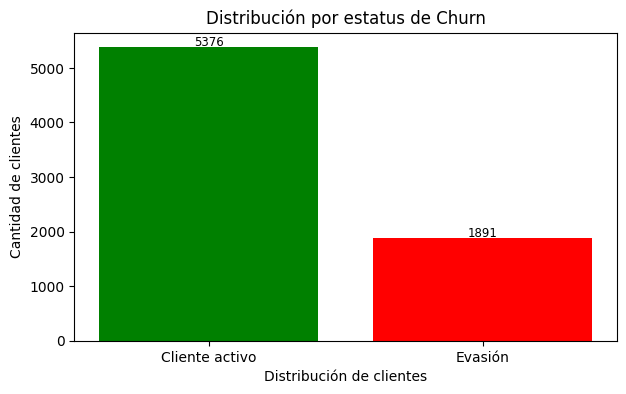

In [118]:
try:
  import matplotlib.pyplot as plt

  categorias = df_telecomx_normalizado['Churn'].value_counts()
  colores = []

  for c in categorias.index:
    if c == 0:
      colores.append('green')
    else:
      colores.append('red')

  plt.figure(figsize=(7,4))
  plt.bar(categorias.index, categorias.values,color=colores)
  plt.title('Distribución por estatus de Churn')
  plt.xlabel('Distribución de clientes')
  plt.ylabel('Cantidad de clientes')
  plt.xticks(rotation=0)
  plt.xticks(ticks=categorias.index, labels=['Cliente activo', 'Evasión'])
  for i, v in enumerate(categorias.values):
      plt.text(i, v + 20, str(v), ha='center', fontsize=8.5, color='black')

  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

**Se utilizó el método [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) para agrupar según el estado del cliente tomando en cuenta algunas variables categóricas como: gender(genero), InternetService(servicio de internet adquirido), Contract(tipo de contrato), PaymentMethod(método de pago). Los valores fueron convertidos a porcentaje en la búsqueda de visualizar su representación en base al total de los datos**

In [119]:
try:
  df_porcentaje = df_telecomx_normalizado.groupby('Churn')[['gender','InternetService','Contract','PaymentMethod']]\
  .value_counts(normalize=True).reset_index(name='porcentaje')
  df_porcentaje['porcentaje'] = df_porcentaje['porcentaje']*100
  df_porcentaje['ID'] = df_porcentaje.index + 1
  df_porcentaje = df_porcentaje.set_index('ID')
  df_porcentaje

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_porcentaje)



,Churn,gender,InternetService,Contract,PaymentMethod,porcentaje
ID,,,,,,
1,0,Male,Fiber optic,Month-to-month,Electronic check,5.394345
2,0,Female,Fiber optic,Month-to-month,Electronic check,5.115327
3,0,Female,DSL,Month-to-month,Electronic check,2.976190
4,0,Male,DSL,Month-to-month,Mailed check,2.622768
5,0,Male,No,Month-to-month,Mailed check,2.622768
...,...,...,...,...,...,...
133,1,Male,No,One year,Bank transfer (automatic),0.052882
134,1,Male,No,One year,Credit card (automatic),0.052882
135,1,Male,No,One year,Mailed check,0.052882


**Se aplicó un filtro para obtener los clientes activos del conjunto de datos y conocer por cada tipo de variable el porcentaje que representan. Se utilizó la propiedad [style](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.style.html#pandas.DataFrame.style) esta nos permite estilizar aún más los datos con codigo HTML y CSS, también se incorporó un gráfico de barra de color verde claro para mayor interpretación**

In [120]:
try:
  df_porcentaje_estilo_activos = df_porcentaje.loc[df_porcentaje['Churn'] == 0].style
  df_porcentaje_estilo_activos.format({'porcentaje': '{:.2f}%'}).bar(subset=['porcentaje'], color='lightgreen',vmin=0,vmax=100)

  tabla = {
      'selector': 'th',
      'props': 'font-weight:bold; font-family:Arial; font-size:14; text-align:center; background-color:white; color:black'
          }

  celda = {
      'selector': 'td',
      'props': 'font-family:Arial; font-size:12; text-align:center; background-color:white; color:black'
  }

  indicesx = {
      'selector': '.index_name',
      'props': 'font-family:Arial; text-align:right; color:blue; background-color:white'
      }

  df_porcentaje_estilo_activos.set_table_styles([tabla, celda,indicesx],overwrite=False)

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_porcentaje_estilo_activos)

,Churn,gender,InternetService,Contract,PaymentMethod,porcentaje
ID,,,,,,
1,0,Male,Fiber optic,Month-to-month,Electronic check,5.39%
2,0,Female,Fiber optic,Month-to-month,Electronic check,5.12%
3,0,Female,DSL,Month-to-month,Electronic check,2.98%
4,0,Male,DSL,Month-to-month,Mailed check,2.62%
5,0,Male,No,Month-to-month,Mailed check,2.62%
6,0,Male,DSL,Month-to-month,Electronic check,2.51%
7,0,Male,No,Two year,Mailed check,2.46%
8,0,Female,No,Month-to-month,Mailed check,2.42%
9,0,Female,No,Two year,Mailed check,2.36%


**Se aplicó un filtro para obtener los clientes que cancelaron en el conjunto de datos y conocer por cada tipo de variable el porcentaje que representan. Se utilizó la propiedad [style](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.style.html#pandas.DataFrame.style) esta nos permite estilizar aún más los datos con codigo HTML y CSS, también se incorporó un gráfico de barra de color verde claro para mayor interpretación**

In [121]:
try:
  df_porcentaje_estilo_evasion = df_porcentaje.loc[df_porcentaje['Churn'] == 1].style
  df_porcentaje_estilo_evasion.format({'porcentaje': '{:.2f}%'}).bar(subset=['porcentaje'], color='lightgreen',vmin=0,vmax=100)

  tabla = {
      'selector': 'th',
      'props': 'font-weight:bold; font-family:Arial; font-size:14; text-align:center; background-color:white; color:black'
          }

  celda = {
      'selector': 'td',
      'props': 'font-family:Arial; font-size:12; text-align:center; background-color:white; color:black'
  }

  indicesx = {
      'selector': '.index_name',
      'props': 'font-family:Arial; text-align:right; color:blue; background-color:white'
      }

  df_porcentaje_estilo_evasion.set_table_styles([tabla, celda,indicesx],overwrite=False)

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')
else:
  display(df_porcentaje_estilo_evasion)

,Churn,gender,InternetService,Contract,PaymentMethod,porcentaje
ID,,,,,,
73,1,Male,Fiber optic,Month-to-month,Electronic check,21.15%
74,1,Female,Fiber optic,Month-to-month,Electronic check,20.73%
75,1,Male,DSL,Month-to-month,Electronic check,5.13%
76,1,Female,DSL,Month-to-month,Electronic check,5.08%
77,1,Female,Fiber optic,Month-to-month,Bank transfer (automatic),4.65%
78,1,Female,Fiber optic,Month-to-month,Credit card (automatic),3.70%
79,1,Male,Fiber optic,Month-to-month,Bank transfer (automatic),3.33%
80,1,Male,DSL,Month-to-month,Mailed check,3.28%
81,1,Female,Fiber optic,Month-to-month,Mailed check,2.86%


#### **Gráfico de barras📊: Cantidad de clientes según su género**

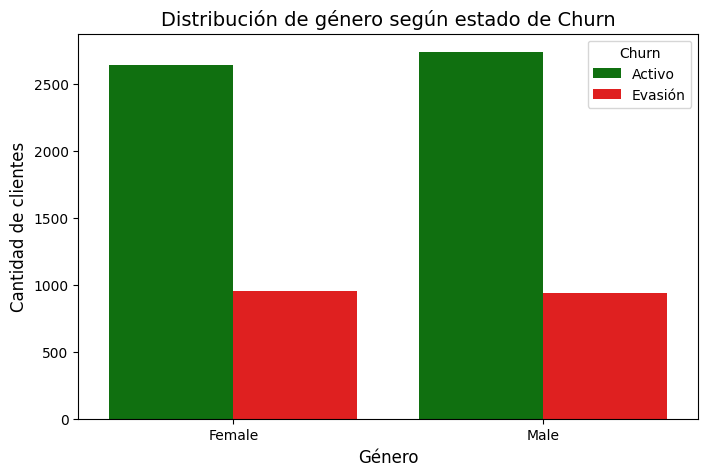

In [122]:
try:
  from pandas.core.frame import DataFrame
  import seaborn as sns
  import matplotlib.pyplot as plt

  colores_genero = ['green','red']
  plt.figure(figsize=(8,5))
  sns.countplot(data=df_telecomx_normalizado, x='gender', hue='Churn', palette=colores_genero)
  plt.title('Distribución de género según estado de Churn', fontsize=14)
  plt.xlabel('Género', fontsize=12)
  plt.ylabel('Cantidad de clientes', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(title='Churn', labels=['Activo', 'Evasión'])
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

#### **Gráfico de barras📊: Cantidad de clientes según tipo Servicio de Internet**

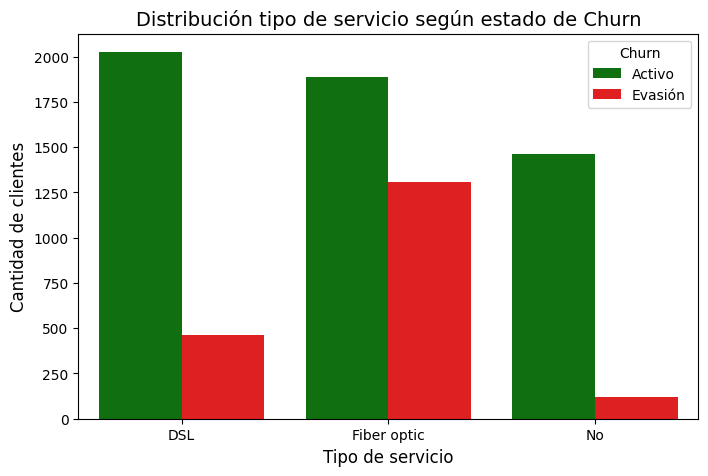

In [123]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt

  colores_genero = ['green','red']
  plt.figure(figsize=(8,5))
  sns.countplot(data=df_telecomx_normalizado, x='InternetService', hue='Churn', palette=colores_genero)
  plt.title('Distribución tipo de servicio según estado de Churn', fontsize=14)
  plt.xlabel('Tipo de servicio', fontsize=12)
  plt.ylabel('Cantidad de clientes', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(title='Churn', labels=['Activo', 'Evasión'])
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

#### **Gráfico de barras📊: Cantidad de clientes según tipo de contrato**

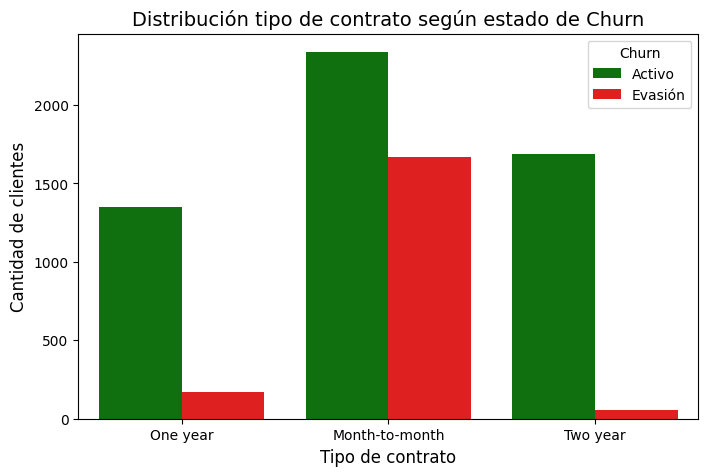

In [124]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt

  colores_genero = ['green','red']
  plt.figure(figsize=(8,5))
  sns.countplot(data=df_telecomx_normalizado, x='Contract', hue='Churn', palette=colores_genero)
  plt.title('Distribución tipo de contrato según estado de Churn', fontsize=14)
  plt.xlabel('Tipo de contrato', fontsize=12)
  plt.ylabel('Cantidad de clientes', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(title='Churn', labels=['Activo', 'Evasión'])
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

#### **Gráfico de barras📊: Cantidad de clientes según tipo método de pagó**

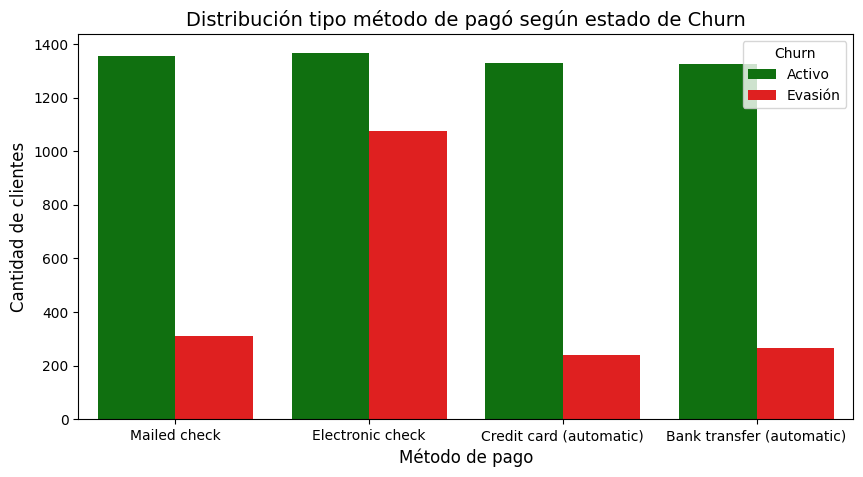

In [125]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt

  colores_genero = ['green','red']
  plt.figure(figsize=(10,5))
  sns.countplot(data=df_telecomx_normalizado, x='PaymentMethod', hue='Churn', palette=colores_genero)
  plt.title('Distribución tipo método de pagó según estado de Churn', fontsize=14)
  plt.xlabel('Método de pago', fontsize=12)
  plt.ylabel('Cantidad de clientes', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(title='Churn', labels=['Activo', 'Evasión'])
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')


#### **Gráfico de caja📊: En este se muestra la distribución del tiempo de contrato por estado del cliente: activo o halla cancelado**

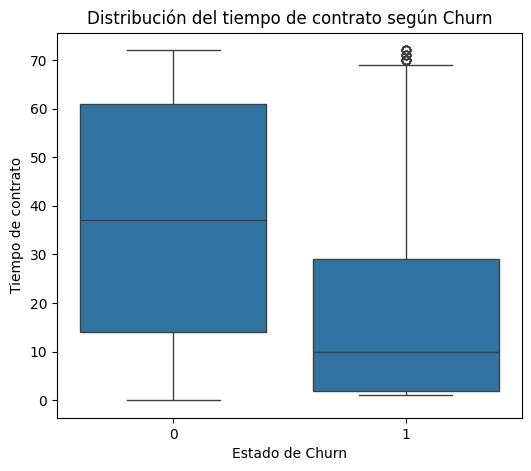

In [126]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.figure(figsize=(6,5))
  sns.boxplot(x='Churn',y='tenure',data=df_telecomx_normalizado)

  plt.title('Distribución del tiempo de contrato según Churn')
  plt.xlabel('Estado de Churn')
  plt.ylabel('Tiempo de contrato')
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

#### **Gráfico de caja📊: En este se muestra la distribución del total gastado durante el tiempo de contrato por estado del cliente: activo o halla cancelado**

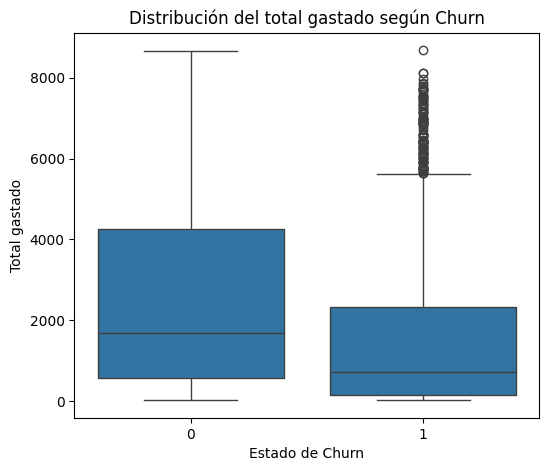

In [127]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.figure(figsize=(6,5))
  sns.boxplot(x='Churn',y='ChargesTotal',data=df_telecomx_normalizado)

  plt.title('Distribución del total gastado según Churn')
  plt.xlabel('Estado de Churn')
  plt.ylabel('Total gastado')
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')


#### **Gráfico de caja📊: En este se muestra la distribución del gasto mensual por estado del cliente: activo o halla cancelado**

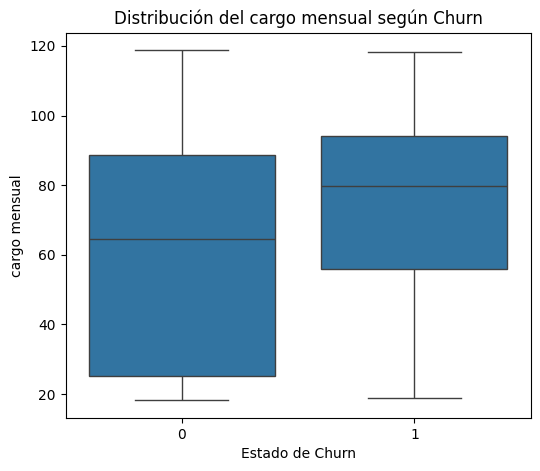

In [128]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.figure(figsize=(6,5))
  sns.boxplot(x='Churn',y='ChargesMonthly',data=df_telecomx_normalizado)

  plt.title('Distribución del cargo mensual según Churn')
  plt.xlabel('Estado de Churn')
  plt.ylabel('cargo mensual')
  plt.show()

except Exception as e:
  print(f'Error al extraer los datos verifique: {e}')

# **INFORME FINAL 📄 Análisis de Cancelación de Clientes (Churn)**

**1. Contexto y Objetivo del Análisis**

El presente análisis tuvo como finalidad comprender las causas detrás del alto nivel de cancelaciones (churn) en los servicios ofrecidos por la empresa.
La motivación principal fue responder a la pregunta: ¿por qué los clientes están cancelando sus servicios?

**El objetivo del estudio consistió en:**

◾Identificar los factores que influyen en la evasión de clientes.

◾Analizar patrones de comportamiento asociados a la cancelación.

◾Proponer posibles planes o estrategias que permitan reducir el churn y aumentar la retención de clientes.

Durante el desarrollo del análisis, se identificaron múltiples variables que influyen directamente en la decisión de cancelación, las cuales se detallan en las siguientes secciones.

**2. Limpieza y Tratamiento de los Datos**

Para garantizar la calidad y confiabilidad del análisis, se realizó un proceso exhaustivo de limpieza y transformación de datos utilizando las bibliotecas Pandas y NumPy.

**Las principales acciones realizadas fueron:**

◾ Conversión de variables originalmente almacenadas como texto a valores  numéricos, permitiendo realizar cálculos y análisis estadísticos precisos.

◾ Tratamiento de valores nulos para evitar sesgos o resultados inconsistentes en los cálculos.

◾ Codificación binaria de variables categóricas, donde:

0 = "No"

1 = "Yes"

**Las columnas transformadas fueron:**

Churn, Partner, Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PhoneService, MultipleLines y PaperlessBilling.

Adicionalmente, se creó una nueva variable denominada Cargo Diario, calculada a partir del gasto total acumulado y la duración del contrato (en meses), estimando el costo promedio diario de cada cliente.

**3. Análisis Exploratorio de Datos (EDA)**

**En esta etapa se desarrollaron diversas visualizaciones gráficas con el objetivo de:**

◾ Analizar la distribución de las variables numéricas y categóricas.

◾ Identificar patrones y relaciones entre el estado del cliente (activo o en evasión) y sus características.

Se utilizaron gráficos de barras, distribuciones y comparaciones segmentadas por churn para facilitar la interpretación visual de los resultados.

**Gráficas utilizadas a continuación**

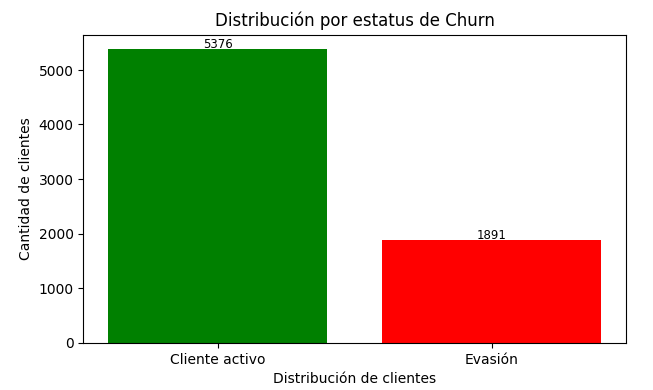


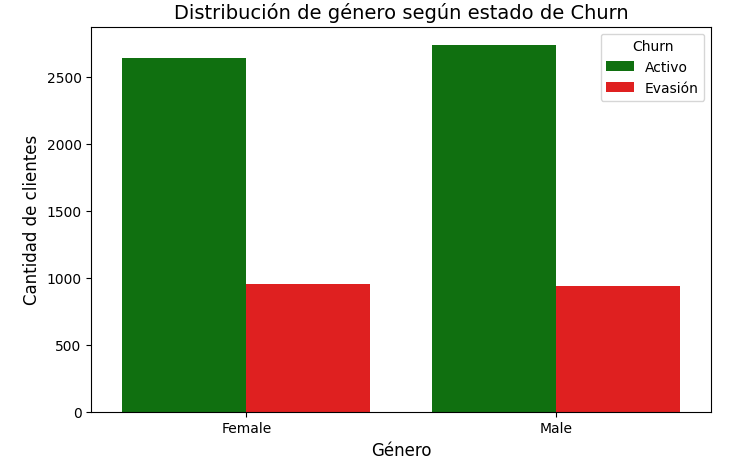

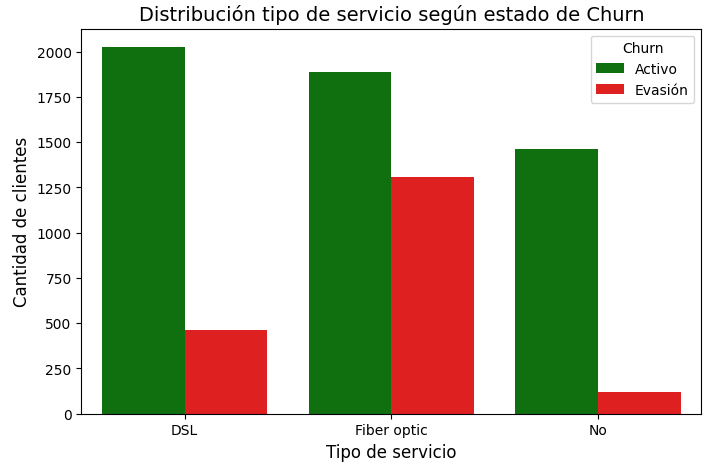

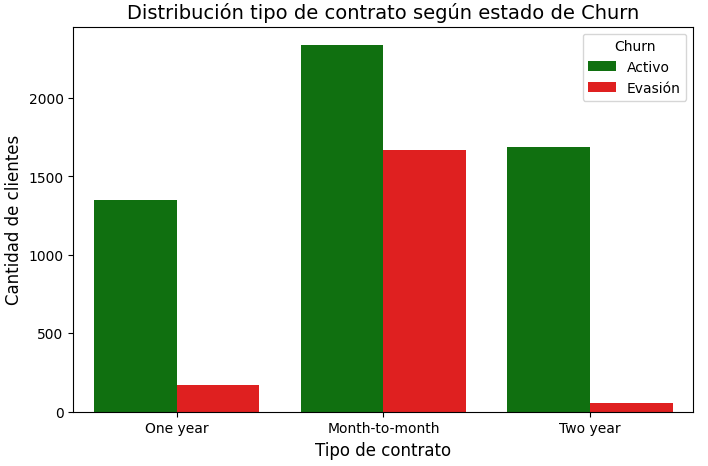

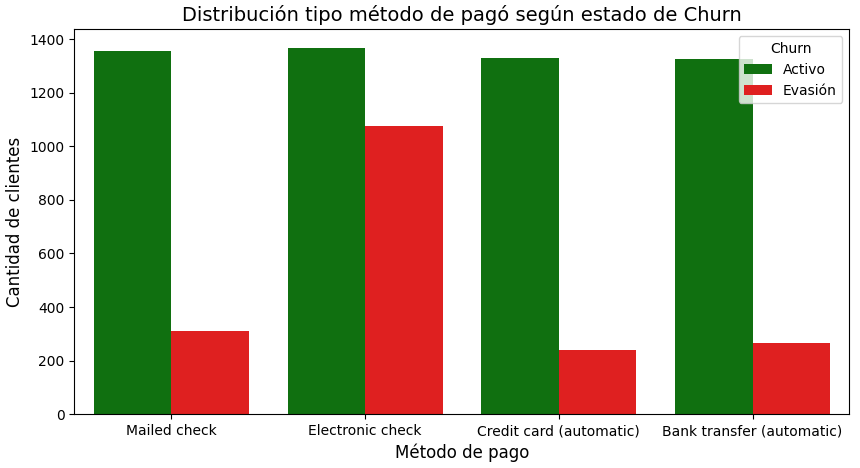

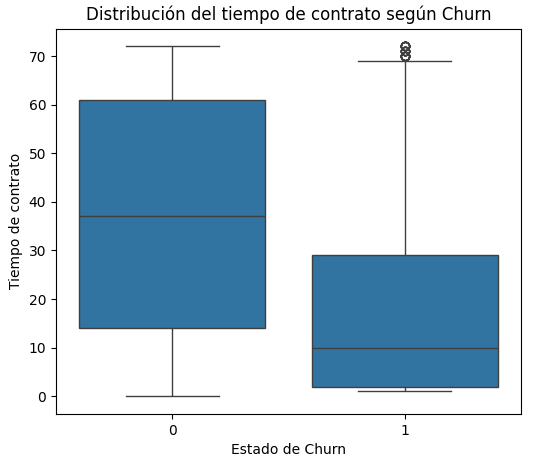

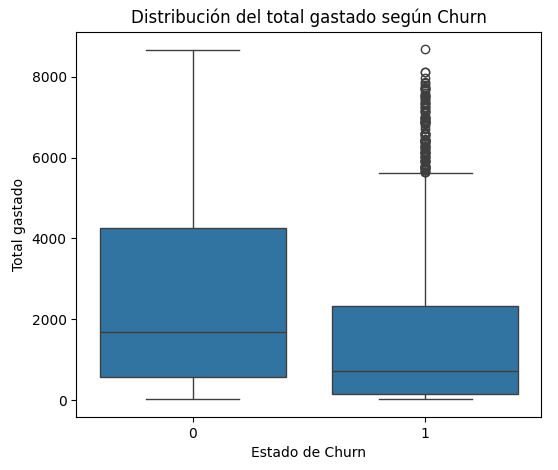

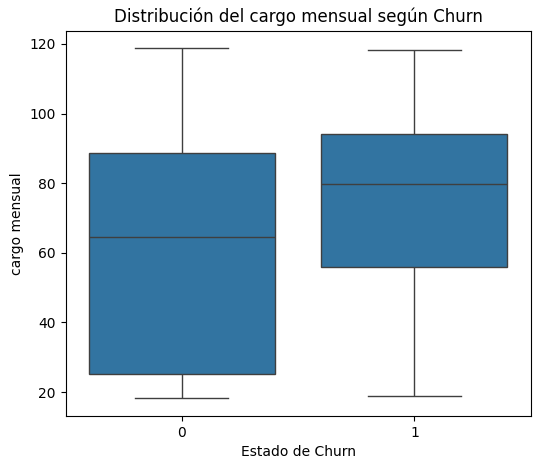


**4. Conclusiones e Insights**

**Variables Numéricas**

El análisis de las variables numéricas evidencia diferencias significativas entre clientes activos y clientes en evasión:

Los clientes que cancelan presentan:

◾ Menor tiempo de permanencia.

◾ Menor gasto total acumulado.

◾ Mayor cargo mensual promedio.

Estos resultados indican que la evasión ocurre principalmente en etapas tempranas de la relación con el cliente, donde los costos percibidos son relativamente altos.
Esto refuerza la importancia del precio y la antigüedad del cliente como factores clave en el churn.

**Variables Categóricas**

El análisis de las variables categóricas muestra patrones relevantes:

Género:

◾ Los hombres representan la mayor cantidad de clientes activos y una menor proporción de clientes en evasión.

◾ Las mujeres concentran una mayor proporción de clientes que cancelan el servicio.

**Tipo de servicio de Internet:**

◾ DSL presenta la mayor cantidad de clientes activos y una baja tasa de evasión, lo que sugiere que es el servicio mejor valorado por los clientes.

◾ Fibra óptica, aunque cuenta con una base importante de clientes activos, lidera en cantidad de cancelaciones. Esto podría indicar problemas relacionados con:

◾ Precio elevado.

◾ Rendimiento que no cumple con las expectativas del cliente.

**Tipo de contrato:**

◾ El contrato mes a mes concentra tanto la mayor cantidad de clientes activos como la mayor cantidad de clientes en evasión, con valores muy cercanos entre sí.

◾ Esto evidencia una alta volatilidad y menor compromiso por parte de los clientes bajo este tipo de contrato.

**Método de pago:**

Todos los métodos presentan cantidades similares de clientes activos.

Sin embargo, el método Electronic Check muestra una cantidad significativamente alta de clientes en evasión, casi equivalente a la de clientes activos.

Esto sugiere posibles inconvenientes relacionados con:

◾ Experiencia de uso.

◾ Procesos de pago lentos o poco confiables.

◾ Problemas con la plataforma o la entidad bancaria.

# **Recomendaciones Estratégicas 📊**

Con base en los resultados del análisis, se proponen las siguientes recomendaciones:

**1. Estrategias de Retención Temprana**

Implementar programas de seguimiento durante los primeros meses del cliente, etapa donde se concentra la mayor tasa de churn.

Ofrecer descuentos o beneficios temporales para clientes nuevos con cargos mensuales elevados.

**2. Revisión del Servicio de Fibra Óptica**

Evaluar la relación precio–rendimiento del servicio.

Realizar encuestas de satisfacción específicas para clientes de fibra óptica.

Considerar planes escalonados o ajustes de precio según consumo real.

**3. Incentivar Contratos de Mayor Duración**

Promover contratos anuales o semestrales mediante:

Descuentos.

Beneficios exclusivos.

Bonificaciones por permanencia.

Reducir la dependencia del contrato mes a mes, que presenta mayor volatilidad.

**4. Optimización de Métodos de Pago**

Analizar y mejorar la experiencia del método Electronic Check.

Incentivar métodos de pago automáticos (tarjeta o débito directo) mediante beneficios adicionales.

Simplificar los procesos de facturación y confirmación de pagos.

**5. Segmentación y Personalización**

Diseñar campañas de retención segmentadas por:

Género.

Tipo de servicio.

Tipo de contrato.

Utilizar modelos predictivos de churn para identificar clientes con alto riesgo de cancelación y actuar de forma preventiva.